In [1]:
# $$$$$$$   Data Cleaning and cropping image ( in which face and eyes are visible ) 
import pandas as pd 
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline 

In [2]:
img = cv2.imread('./test_images/ayush31.jpg')
img.shape    # it gives 3 dimensions ( X , Y , RGB channel ( due to which picture is colorful )  

(1333, 1000, 3)

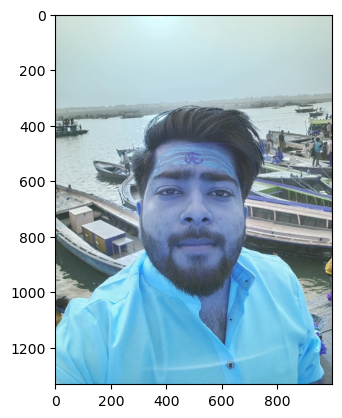

In [3]:
plt.imshow(img)

In [4]:
# showing gray image ( third dimension , color is removed ) 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1333, 1000)

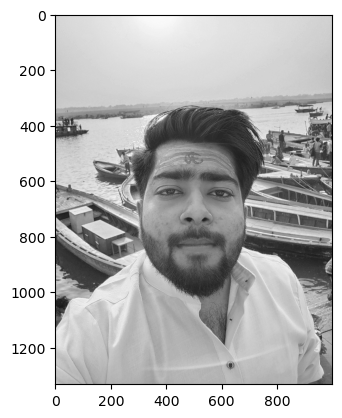

In [5]:
plt.imshow(gray , cmap = 'gray')

In [6]:
gray

array([[215, 214, 219, ..., 214, 207, 207],
       [215, 217, 215, ..., 213, 211, 214],
       [218, 216, 218, ..., 209, 206, 219],
       ...,
       [206, 202, 202, ..., 122, 119, 118],
       [206, 203, 203, ..., 122, 119, 118],
       [207, 206, 205, ..., 121, 119, 118]], dtype=uint8)

In [7]:
# using Haar Cascade for detecting face and eyes 

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces   # it gives 4 D array , giving position of face .

array([[271, 452, 473, 473]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(271, 452, 473, 473)

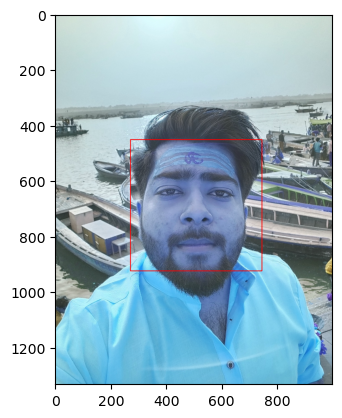

In [9]:
# drawing rectangle around image 

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

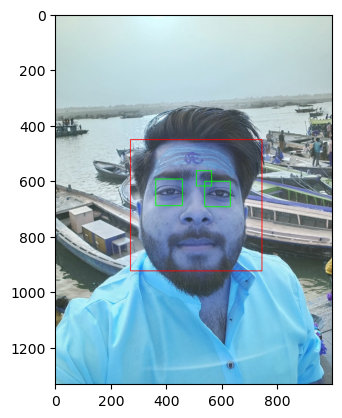

In [10]:
# drawing eyes 

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

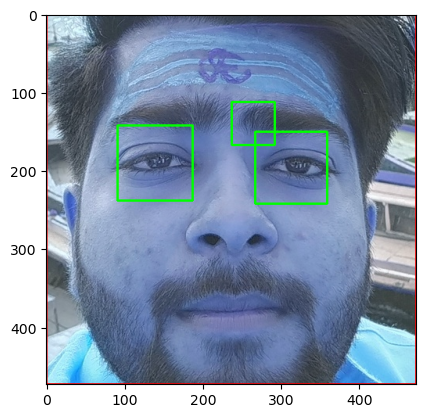

In [11]:
%matplotlib inline 
plt.imshow(roi_color , cmap = 'gray')    # roi is region of interest 

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(473, 473, 3)

In [13]:
# so here we are interested in facial region of every images in our dataset , we will crop those images and use it for model training

# let's write a function , which return cropped face with eyes detected

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color       # it is returning single image ( if accessed in folder , then it will return 1st image ) 
        


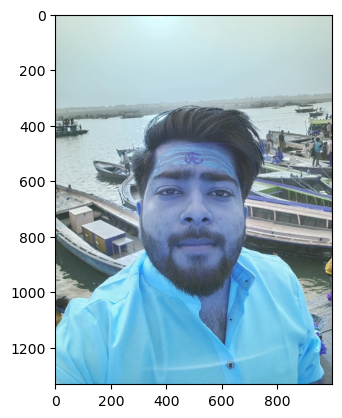

In [14]:
original_image = cv2.imread('./test_images/ayush31.jpg')
plt.imshow(original_image)

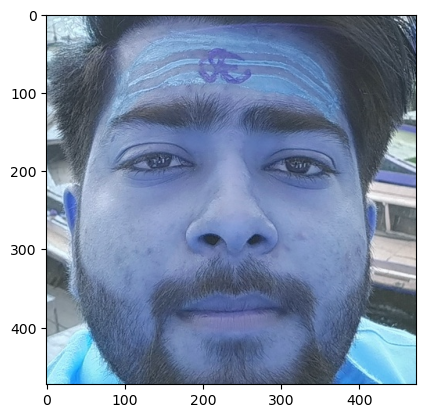

In [15]:
# getting cropped image using function  ( obstructed image won't run )  

cropped_image = get_cropped_image_if_2_eyes('./test_images/ayush31.jpg')
plt.imshow(cropped_image)

In [16]:
# making cropped folder to store all the cropped images

path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)   # stores name of directories / folders present in dataset folder 

In [21]:
img_dirs

['./dataset/aman',
 './dataset/arvind',
 './dataset/ayush',
 './dataset/sakib',
 './dataset/virat_kohli']

In [22]:
# till now cropped folder is not generated but now let's create 

import shutil 
if os.path.exists(path_to_cr_data):   # while executing this segment if folder cropped exits, then  it delete it otherwise it will give error  
    shutil.rmtree(path_to_cr_data)    # cropped folder is is emptied 
os.mkdir(path_to_cr_data)            # make directory ( make cropped folder )

In [23]:
cropped_image_dirs = []
friend_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    friend_name = img_dir.split('/')[-1]    # -1 gives last element from the list , ( img_dir contains path in this ( './dataset/abhishek') form , and it is splitted then ) 
    print(friend_name)

    friend_file_names_dict[friend_name] = [] 

    for entry in os.scandir(img_dir):                           # accessing path of a file in any particular directory
        roi_color =  get_cropped_image_if_2_eyes(entry.path)     # it returns path of file 
        if roi_color is not None :
           cropped_folder = path_to_cr_data + friend_name       # it creates sub folder of friend name in cropped folder 
           if not os.path.exists(cropped_folder):
               os.makedirs(cropped_folder)                       # if sub folder not exists , then make it
               cropped_image_dirs.append(cropped_folder)
               print("Generating cropped images in folder : " , cropped_folder)

           cropped_file_name = friend_name + str(count) + ".png"           # name like ayush1.png etc . (it is cropped image , which we want to save in cropped folder )
           cropped_file_path = cropped_folder + "/" + cropped_file_name    # naming path of cropped image generated 

           cv2.imwrite(cropped_file_path,roi_color)                        # saving roi color as image in cropped folder 
           friend_file_names_dict[friend_name].append(cropped_file_path)   # creating a dictionary , key --> name of friend , value ---> path of cropped images
           count += 1

aman
Generating cropped images in folder :  ./dataset/cropped/aman
arvind
Generating cropped images in folder :  ./dataset/cropped/arvind
ayush
Generating cropped images in folder :  ./dataset/cropped/ayush
sakib
Generating cropped images in folder :  ./dataset/cropped/sakib
virat_kohli
Generating cropped images in folder :  ./dataset/cropped/virat_kohli


In [32]:
# after this step , as cropped images are created in cropped folder , we have to do data cleaning manually ( means removing unnecessary images ) 

In [33]:
#  $$$$$  Feature Engineering 
#  Using Wavelet Transformation 

#  Represents image as frequency ( image can also be considered as signal.
# Image can be represented by 2 domain  ( as audio in time & frequency domain ) 
  # 1. Spatial domain ( x ,y )
  # 2. Frequency Domain 

# Wavelet Transform is nearly same as Fourier Transform   


In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

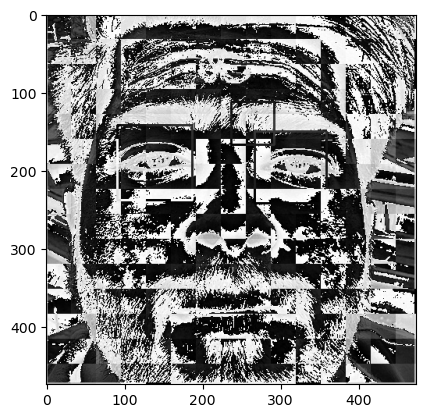

In [25]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')    # this shows transformed wavelet image  

In [26]:

# final , here we are recreating dictionary , as if we have deleted some images during data cleaning 

friend_file_names_dict = {}
for img_dir in cropped_image_dirs:
    friend_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    friend_file_names_dict[friend_name] = file_list
friend_file_names_dict         # made dictionary for accessing cropped images 

{'aman': ['./dataset/cropped/aman\\aman1.png',
  './dataset/cropped/aman\\aman10.png',
  './dataset/cropped/aman\\aman11.png',
  './dataset/cropped/aman\\aman12.png',
  './dataset/cropped/aman\\aman13.png',
  './dataset/cropped/aman\\aman14.png',
  './dataset/cropped/aman\\aman27.png',
  './dataset/cropped/aman\\aman3.png',
  './dataset/cropped/aman\\aman33.png',
  './dataset/cropped/aman\\aman34.png',
  './dataset/cropped/aman\\aman35.png',
  './dataset/cropped/aman\\aman36.png',
  './dataset/cropped/aman\\aman38.png',
  './dataset/cropped/aman\\aman39.png',
  './dataset/cropped/aman\\aman4.png',
  './dataset/cropped/aman\\aman40.png',
  './dataset/cropped/aman\\aman42.png',
  './dataset/cropped/aman\\aman43.png',
  './dataset/cropped/aman\\aman46.png',
  './dataset/cropped/aman\\aman47.png',
  './dataset/cropped/aman\\aman5.png',
  './dataset/cropped/aman\\aman51.png',
  './dataset/cropped/aman\\aman52.png',
  './dataset/cropped/aman\\aman54.png',
  './dataset/cropped/aman\\aman62.pn

In [27]:
class_dict = {}             # assigning numbers to each friends 
count = 0
for friend_name in friend_file_names_dict.keys():
    class_dict[friend_name] = count
    count = count + 1
class_dict

{'aman': 0, 'arvind': 1, 'ayush': 2, 'sakib': 3, 'virat_kohli': 4}

In [28]:
X, y = [], []
for friend_name, training_files in friend_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))   # scaling image in 32 X 32
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))   # vertical scaling using numpy 
        X.append(combined_img)
        y.append(class_dict[friend_name])     

In [29]:
len(X)   # sum of all the images in cropped folder 
# len(X[0])   #   4096  = 32 X 32 X 3  ( colored image )  +  32 X 32 ( transformed wavelet image , here color removed  )          

252

In [30]:
X[0]      # some numbers , representing color shade 

array([[ 79],
       [ 78],
       [110],
       ...,
       [  6],
       [224],
       [ 77]], dtype=uint8)

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)         # converting in floating number , to handle errors  
X.shape

(252, 4096)

In [53]:
#  $$$  Training a Model  

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 0)

In [34]:
# scaling using StandardScaler , then using SVC model
pipe = Pipeline([('scaler' , StandardScaler()) , ( 'svc' , SVC(kernel = 'rbf' , C = 10 ))])
pipe.fit(X_train,y_train)
pipe.score(X_test , y_test) 

0.7301587301587301

In [35]:
# len(X_test)

print(classification_report ( y_test , pipe.predict(X_test)))

# f1 score is a measure of test's score  . It considers both precall and recall.

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.55      0.92      0.69        13
           2       0.75      0.80      0.77        15
           3       1.00      0.22      0.36         9
           4       0.94      0.89      0.92        19

    accuracy                           0.73        63
   macro avg       0.77      0.65      0.65        63
weighted avg       0.79      0.73      0.71        63



In [97]:
# Lets use GridSearchCV to try out different models with different parameters . Goal is to come up with best model with best fine tuned parameters 

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10,100,200]
        }
    }
}

In [48]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.794026,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.713798,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.825178,{'logisticregression__C': 5}


In [49]:
# best_estimators['logistic_regression'].score(X_test,y_test)    # gives best score 
# best_estimators['svm'].score(X_test,y_test)
best_estimators['logistic_regression'].score(X_test,y_test)

0.8095238095238095

In [50]:
best_clf = best_estimators['logistic_regression']

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  2,  0,  1,  0],
       [ 2,  8,  0,  3,  0],
       [ 0,  1, 14,  0,  0],
       [ 0,  1,  0,  8,  0],
       [ 0,  1,  0,  1, 17]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

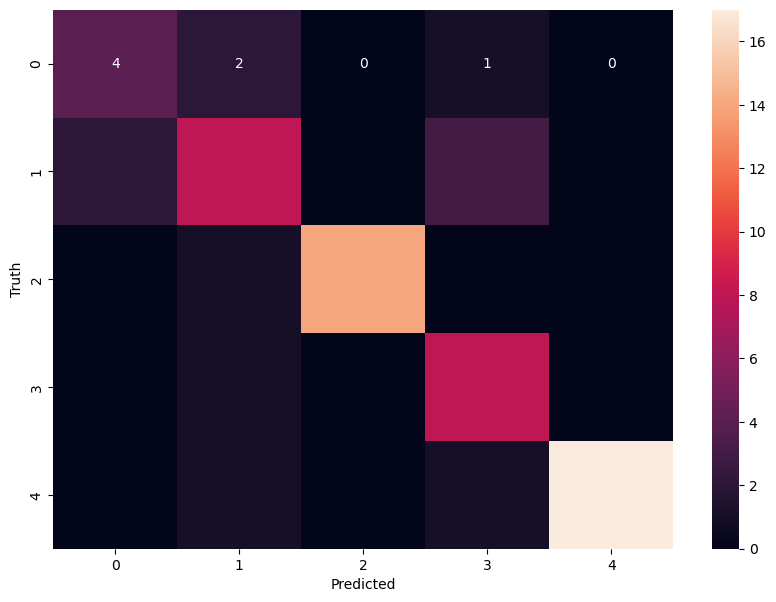

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
class_dict

{'aman': 0, 'arvind': 1, 'ayush': 2, 'sakib': 3, 'virat_kohli': 4}

In [54]:
# saving the trained model 

!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [55]:
# saving json object 

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

# upto this point , job of data scientist is done 